Winter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.interpolate import interp1d
import pyswarms as ps

# File path
path = r"C:\Users\Alexandra\Documents\TEE-etoile\ProCom\donnees_annee.csv"
df = pd.read_csv(path, delimiter=',')
period = 4*24

# Variables

# Surface areas
As = 27.11 + 8.98
Afen = 2.3*2.7 +2.3 * 2.95 + 1*1 + 2*2
Aw = (10.1 + 10.1 + 12 + 9.9 +10.1 + 9.1 + 12 + 9.2) - Afen # verifier si l'on prend em compte le mur autur de la fenetre
Ae = 110
taufen = 0.90
alpha_e = 0.2
alpha_i = 0.4

# Initial conditions from data
Twe = df['Tex'].iloc[0]
Twi = df['Tex'].iloc[0]
Ta = df['Tex'].iloc[0]
X0 = [Ta, Twi, Twe]

# Extract data series
E = df['Radiation'].values
Tex = df['Tex'].values
Tp = df['Tin'].values
Tc = df['Tc'].values

E = E[:period]
Tex =Tex[:period]
Tp = Tp[:period]
Tc = Tc[:period]

# Define interpolation functions
E_func = interp1d(np.arange(len(E)), E, kind='linear', fill_value="extrapolate")
Tex_func = interp1d(np.arange(len(Tex)), Tex, kind='linear', fill_value="extrapolate")
Tc_func = interp1d(np.arange(len(Tc)), Tc, kind='linear', fill_value="extrapolate")

def RC_model_for_optimization(X, E_func, Tex_func, Tc_func, params):
    Ci, Cw, Ke, Kw, Ki, m_dot = params

    MATRIX_A = np.array([
        [-(m_dot + Ki) / Ci, Ki / Ci, 0],
        [2 * Ki / Cw, -2 * (Kw + Ki) / Cw, 2 * Kw / Cw],
        [0, 2 * Kw / Cw, -2 * (Ke + Kw) / Cw]
    ])
    
    MATRIX_B = np.array([
        [0, 0, m_dot / Ci],
        [0, 2 / Cw, 0],
        [2 / Cw, 0, 2 * Ke / Cw]
    ])

    def RC_model(t, X):
        ind = t / 3600
        E_t = E_func(ind)
        Tex_t = Tex_func(ind)
        P_t = 4000 if X[0] < Tc_func(ind) else 0
        Ge_t = alpha_e * Ae / 2 * E_t
        Gi_t = taufen * alpha_i * Afen * E_t
        D = np.array([P_t / Ci, 0, 0])
        C = np.array([Ge_t, Gi_t, Tex_t])
        return MATRIX_A @ X + MATRIX_B @ C + D

    t_span = [0, period * 3600]
    t_eval = np.arange(0, period * 3600, 3600)
    sol = solve_ivp(RC_model, t_span, X0, t_eval=t_eval)
    
    return sol.y[0]  # Return simulated temperature (Ta)

def objective_function(params):
    n_particles = params.shape[0]
    errors = np.zeros(n_particles)
    for i in range(n_particles):
        Ta_simulated = RC_model_for_optimization(X0, E_func, Tex_func, Tc_func, params[i])
        errors[i] = np.mean((Ta_simulated - Tc) ** 2)
    return errors

# Bounds for optimization
bounds = np.array([
    [100e3, 1000e3],
    [10e6, 200e6],
    [0.1e3, 10e3],
    [1, 1e3],
    [0.1e3, 10e3],
    [1, 1e3]
]).T

# PSO optimization
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(objective_function, iters=100)

# Calculate temperature with optimized parameters
Ta_optimized = RC_model_for_optimization(X0, E_func, Tex_func, Tc_func, best_params)

# Print results
param_names = ['Ci', 'Cw', 'Ke', 'Kw', 'Ki', 'm_dot']
for name, value in zip(param_names, best_params):
    print(f"{name}: {value:.6f}")




2025-03-06 15:59:05,190 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.0896
2025-03-06 16:36:41,084 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.08956441110561016, best pos: [6.10091327e+05 1.03270050e+08 4.71197487e+03 4.44863187e+02
 4.40617035e+02 9.62059266e+01]


Ci: 610091.327310
Cw: 103270049.978941
Ke: 4711.974873
Kw: 444.863187
Ki: 440.617035
m_dot: 96.205927


Summer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.interpolate import interp1d
import pyswarms as ps

# File path
path = r"C:\Users\Alexandra\Documents\TEE-etoile\ProCom\donnees_annee.csv"
df = pd.read_csv(path, delimiter=',')
period = 4*24

# Variables

# Surface areas
As = 27.11 + 8.98
Afen = 2.3*2.7 +2.3 * 2.95 + 1*1 + 2*2
Aw = (10.1 + 10.1 + 12 + 9.9 +10.1 + 9.1 + 12 + 9.2) - Afen # verifier si l'on prend em compte le mur autur de la fenetre
Ae = 110
taufen = 0.90
alpha_e = 0.2
alpha_i = 0.4

# Initial conditions from data
Twe = df['Tex'].iloc[0]
Twi = df['Tex'].iloc[0]
Ta = df['Tex'].iloc[0]
X0 = [Ta, Twi, Twe]

# Extract data series
E = df['Radiation'].values
Tex = df['Tex'].values
Tp = df['Tin'].values
Tc = df['Tc'].values

E = E[4000:4000+period]
Tex =Tex[4000:4000+period]
Tp = Tp[4000:4000+period]
Tc = Tc[4000:4000+period]

# Define interpolation functions
E_func = interp1d(np.arange(len(E)), E, kind='linear', fill_value="extrapolate")
Tex_func = interp1d(np.arange(len(Tex)), Tex, kind='linear', fill_value="extrapolate")
Tc_func = interp1d(np.arange(len(Tc)), Tc, kind='linear', fill_value="extrapolate")

def RC_model_for_optimization(X, E_func, Tex_func, Tc_func, params):
    Ci, Cw, Ke, Kw, Ki, m_dot = params

    MATRIX_A = np.array([
        [-(m_dot + Ki) / Ci, Ki / Ci, 0],
        [2 * Ki / Cw, -2 * (Kw + Ki) / Cw, 2 * Kw / Cw],
        [0, 2 * Kw / Cw, -2 * (Ke + Kw) / Cw]
    ])
    
    MATRIX_B = np.array([
        [0, 0, m_dot / Ci],
        [0, 2 / Cw, 0],
        [2 / Cw, 0, 2 * Ke / Cw]
    ])

    def RC_model(t, X):
        ind = t / 3600
        E_t = E_func(ind)
        Tex_t = Tex_func(ind)
        P_t = 4000 if X[0] < Tc_func(ind) else 0
        Ge_t = alpha_e * Ae / 2 * E_t
        Gi_t = taufen * alpha_i * Afen * E_t
        D = np.array([P_t / Ci, 0, 0])
        C = np.array([Ge_t, Gi_t, Tex_t])
        return MATRIX_A @ X + MATRIX_B @ C + D

    t_span = [0, period * 3600]
    t_eval = np.arange(0, period * 3600, 3600)
    sol = solve_ivp(RC_model, t_span, X0, t_eval=t_eval)
    
    return sol.y[0]  # Return simulated temperature (Ta)

def objective_function(params):
    n_particles = params.shape[0]
    errors = np.zeros(n_particles)
    for i in range(n_particles):
        Ta_simulated = RC_model_for_optimization(X0, E_func, Tex_func, Tc_func, params[i])
        errors[i] = np.mean((Ta_simulated - Tc) ** 2)
    return errors

# Bounds for optimization
bounds = np.array([
    [100e3, 1000e3],
    [10e6, 200e6],
    [0.1e3, 10e3],
    [1, 1e3],
    [0.1e3, 10e3],
    [1, 1e3]
]).T

# PSO optimization
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(objective_function, iters=100)

# Calculate temperature with optimized parameters
Ta_optimized = RC_model_for_optimization(X0, E_func, Tex_func, Tc_func, best_params)

# Print results
param_names = ['Ci', 'Cw', 'Ke', 'Kw', 'Ki', 'm_dot']
for name, value in zip(param_names, best_params):
    print(f"{name}: {value:.6f}")




2025-03-06 17:23:03,817 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.84
2025-03-06 17:41:37,528 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.8396294449293236, best pos: [6.76427016e+05 1.74703119e+08 1.01311952e+03 2.10094764e+01
 5.54081522e+02 3.07397496e+02]


Ci: 676427.016262
Cw: 174703119.488074
Ke: 1013.119517
Kw: 21.009476
Ki: 554.081522
m_dot: 307.397496


Modelo Simple

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.interpolate import interp1d
import pyswarms as ps


###------------- Variables-----------------####
path = r'C:\Users\Alexandra\Documents\TEE-etoile\ProCom\donnees_annee.csv'
df = pd.read_csv(path, delimiter=',')

# Surface areas
As = 27.11 + 8.98
Afen = 2.3*2.7 +2.3 * 2.95 + 1*1 + 2*2
Aw = (10.1 + 10.1 + 12 + 9.9 +10.1 + 9.1 + 12 + 9.2) - Afen # verifier si l'on prend em compte le mur autur de la fenetre
Ae = 110
taufen = 0.90
alpha_e = 0.2
alpha_i = 0.4

# Thermal properties
"""
# Calculadas seguindo o Tpleiade por 4dias invierno 
Ci = 610091.327310
Cw = 103270049.978941
Ke = 4711.974873
Kw = 444.863187
Ki = 440.617035
m_dot = 96.205927

# Calculadas seguindo o Tpleiade por 4dias verano
Ci = 676427.016262
Cw = 174703119.488074
Ke = 1013.119517
Kw = 21.009476
Ki = 554.081522
m_dot = 307.397496
"""

Ci = (610091.327310 +  676427.016262)/2  # Thermal capacity of air (J/K)
Cw = (103270049.978941 + 174703119.488074)/2   # Thermal capacity of walls (J/K)
Ke = (4711.974873+1013.119517)/2      # External thermal resistance (W/K) 
Kw = (444.863187+21.009476)/2  # Thermal resistance of walls (W/K)
Ki = (440.617035+554.081522)/2     # Internal thermal resistance (W/K)
m_dot = (96.205927+307.397496)/2  # Infiltration rate (W/K)


# Initial conditions from data
Twe = df['Tex'].iloc[0]     # External wall temperature
Twi = df['Tin'].iloc[0]     # Internal wall temperature
Ta = df['Tin'].iloc[0]      # Air temperature
X0 = [Ta, Twi, Twe]         # Initial conditions vectori, Twe]   # Initial condition

# Extract data series
E = df['Radiation'].values
Tex = df['Tex'].values
Tp = df['Tin'].values
Tc = df['Tc'].values


#period = 4*24
#E = E[:period]
#Tex =Tex[:period]
#Tp = Tp[:period]
#Tc = Tc[:period]

#verano
#E = E[4000:4000+period]
#Tex =Tex[4000:4000+period]
#Tp = Tp[4000:4000+period]
#Tc = Tc[4000:4000+period]


###------------- MODELO -----------------####


MATRIX_A = [
    [-(m_dot + Ki) / Ci, Ki/Ci, 0],
    [2 * Ki / Cw, -2 * (Kw + Ki) / Cw, 2 * Kw / Cw],
    [0, 2 * Kw / Cw, -2 * (Ke + Kw) / Cw]
]

MATRIX_B = [
    [0, 0, m_dot / Ci],
    [0, 2 / Cw , 0],
    [2 / Cw, 0, 2 * Ke / Cw ]
]


E_func = interp1d(np.arange(len(E)), E, kind='linear', fill_value="extrapolate")
Tex_func = interp1d(np.arange(len(Tex)), Tex, kind='linear', fill_value="extrapolate")
Tc_func = interp1d(np.arange(len(Tc)), Tc, kind='linear', fill_value="extrapolate")

def RC_model(t, X, MATRIX_A, MATRIX_B, P_array):

    ind = t/3600
    
    # Evaluar las señales en el tiempo t
    E_t = E_func(ind)
    Tex_t = Tex_func(ind)
    
    if X[0] <  Tc_func(ind):
        P_t = 4000
    else:
        P_t = 0
    
    P_array[int(ind)-1] = P_t
    Ge_t = alpha_e * Ae / 2 * E_t 
    Gi_t = taufen * alpha_i * Afen * E_t

    D = np.array([P_t / Ci, 0, 0])
    C = np.array([Ge_t, Gi_t, Tex_t ])

    return MATRIX_A @ X + MATRIX_B @ C + D

# Solving System
t_span = [0, len(E)*3600] #seconds
t_eval = np.arange(0, len(E)*3600, 3600)
P_array = np.zeros(len(t_eval))

sol = solve_ivp(RC_model, t_span, X0, t_eval=t_eval, args=(MATRIX_A, MATRIX_B, P_array))
time = sol.t
T_a, T_w_i, T_w_e = sol.y


In [58]:
MSE = np.mean((T_a - Tp[:len(T_a)]) ** 2)
#MSE = np.mean((T_a[4000:4098] - Tp[4000:4098]) ** 2)
horas = np.count_nonzero(P_array == 4000)
print(f"L'energie consomme est: {horas*4000} Wh")
print(f"Le MSE: {MSE}")


L'energie consomme est: 11836000 Wh
Le MSE: 1.990474673874126


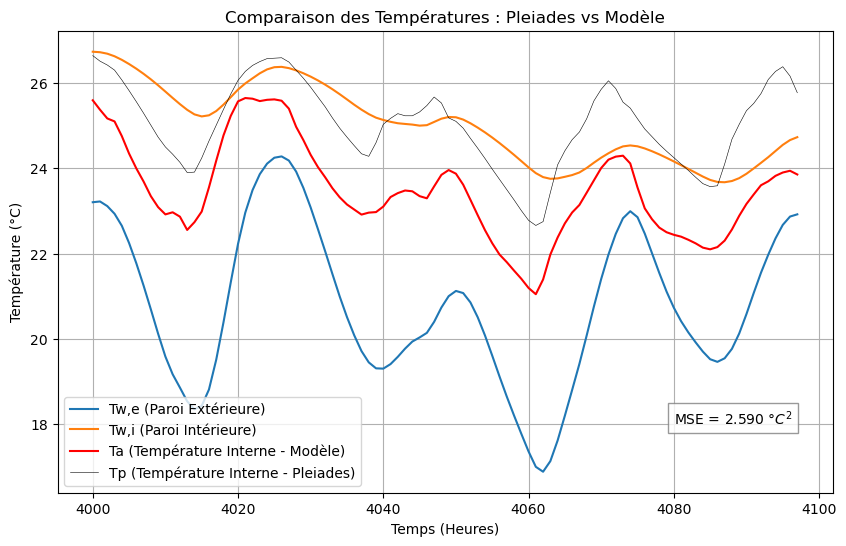

In [57]:
time = np.arange(len(T_a))
plt.figure(figsize=(10, 6))
plt.plot(time[4000:4098], T_w_e[4000:4098], label="Tw,e (Paroi Extérieure)")
plt.plot(time[4000:4098], T_w_i[4000:4098], label="Tw,i (Paroi Intérieure)")
plt.plot(time[4000:4098], T_a[4000:4098], label="Ta (Température Interne - Modèle)", color = 'red')
plt.plot(time[4000:4098], Tp[4000:4098], label = 'Tp (Température Interne - Pleiades)', color = 'black', linewidth = 0.4)
#plt.text(7000,31,(f'MSE = {MSE:.3f} $°C ^2$'), bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(4080,18,(f'MSE = {MSE:.3f} $°C ^2$'), bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.xlabel("Temps (Heures)")
plt.ylabel('Température (°C)')
plt.title('Comparaison des Températures : Pleiades vs Modèle')
plt.legend()
plt.grid()
plt.show()

